# DECISION TREES
notes and code examples created or collected by Pawel Rosikiewicz, __www.SimpleAI.ch__   
part of the text in that text copied from great text of __Nagesh Singh Chauhan__ - link in sourses. Thank you Nagesh.

## CONTENT
* __Decision trees__
    * theory, 
    * sklearn obejcts,
        * DecisionTreeClassifier
    * tree vizulalization
        * Graphiz package, 
        * using pandas for better intepretation,
        
* __sources__
    * realy good article on decision trees wiht example in python, sklearn by __Nagesh Singh Chauhan__ https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html - I copied some part of text from his artickle, if you want more info, please chek directly in his work.

        

## MODEL ASSUMPTIONS
---
1. the whole training set is considered as the root.
2. Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
3. Records are distributed recursively on the basis of attribute values.
4. Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

from: https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/notebook

![outliers_slide_01](images/DT_slide01.jpeg)

## Prunning
copied from: https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/notebook

__Overfitting__ is a practical problem while building a Decision-Tree model. The problem of overfitting is considered when the algorithm continues to go deeper and deeper to reduce the training-set error but results with an increased test-set error. So, accuracy of prediction for our model goes down. It generally happens when we build many branches due to outliers and irregularities in data.

Two approaches which can be used to avoid overfitting are as follows:-

* __Pre-Pruning__
    * In pre-pruning, we stop the tree construction a bit early. 
    * We prefer not to split a node if its goodness measure is below a threshold value. 
    * it is difficult to choose an appropriate stopping point.

* __Post-Pruning__
    * In post-pruning, we go deeper and deeper in the tree to build a complete tree. 
    * If the tree shows the overfitting problem then pruning is done as a post-pruning step. 
    * We use the __cross-validation data__ to check the effect of our pruning. 
        * Using cross-validation data, we test whether expanding a node will result in improve or not. 
        * If it shows an improvement, then we can continue by expanding that node. But if it shows a reduction in accuracy then it should not be expanded. So, the node should be converted to a leaf node.

## __Decision trees - Protential problmes, and solutions__ 
___

### __Imbalanced classes, (class Imbalance problem)__
* also present when using k-NN
* Issue: the tree classifier will optimize toward most frequent class in target variable, 
* __Solutions:__     
    * remove some examples from the most frequent class, 
    * modify objective function of a classifier/cost function 
        * eg. add weights to less frequent/underrepresented class/es
        * class_weight - it is a parameter in skleanr DecisionTreeClassifier, you need to set it to {balanced}
        
        
### __avoiding overfitting__  
* __Prunning__
* __apply random forest__, an ensemble method based onn decision trees, 



    
    
    
    

![outliers_slide_01](images/DT_slide02.jpeg)

## Sklearn implementation
---

general imports

In [1]:
import matplotlib.pyplot as plt # for making plots, 
import matplotlib as mpl # to get some basif functions, heping with plot mnaking
import numpy as np # support for multi-dimensional arrays and matrices
import pandas as pd # library for data manipulation and analysis
import random # functions that use and generate random numbers
import glob # lists names in folders that match Unix shell patterns
import re # module to use regular expressions, 
import os # allow changing, and navigating files and folders, 
import seaborn as sns # advance plots, for statistics,
import scipy.stats as stats  # library for statistics and technical programming, 
%matplotlib inline

### sklearn.tree.DecisionTreeClassifier
* use CART algorithm
* informaiton

#### important comments:
* __criterion{“gini”, “entropy”}, default=”gini”__,
    * ENTROPY - favors smaller partitions with disting values at leaves
    * GINI - favors larger partions at nodes/leaves wiht easier to split values



* __.predict_proba()__
    * A decision tree computes the class probability from the number of samples of each class that fall into a given leaf.
    * The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees I.e. the tree is grown until it perfectly (over)fits the training data. This means that all training samples in each leaf are of the same class and a test sample either matches that class (p=1) or does not (p=0).
    * To get finer probability estimates you can restrict min_samples_leaf so that there is a minimum number of samples in each leaf, which will be used to compute probabilities (with one sample you get [0, 1] - with e.g. 10 samples you can get [0, 0.1, 0.2, ..., 0.9, 1]). You are going to have to experiment with the settings to find which numbers work best for you and your data.

#### create the data

X.shape (200, 2)
y [0 1 1 0 1]


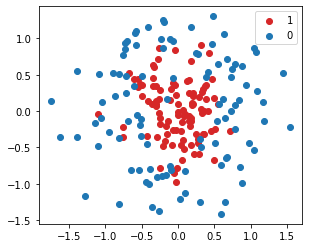

In [3]:
from sklearn.datasets import make_circles

# create the data co classyfication, 
X, y = make_circles(
    n_samples=200,    # total points in dataset, equal nr in both circles
    factor=0.3,       # distance between circles,  
    noise=0.3,        # noise level
    shuffle=True,
    random_state=0
)

# check
print(f"X.shape {X.shape}")
print(f"y {y[0:5]}")

# plot
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box') # Same scale for x- and y-axis
ax.scatter(X[:, 0][(y == 1)], X[:, 1][(y == 1)], c='C3', label='1') # blue
ax.scatter(X[:, 0][~(y == 1)], X[:, 1][~(y == 1)], c='C0', label='0') # red
ax.legend()
plt.show();

#### create dt classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

# create classifier
clf = DecisionTreeClassifier(
        criterion='gini', # {“gini”, “entropy”}, default=”gini”
        splitter='best', # {“best”, “random”}, default=”best”
        max_depth=60,  
        max_leaf_nodes=100, # max nr of leaf nodes
        random_state=0    
    ) 

dt acc: 1.0
baseline acc: 0.5


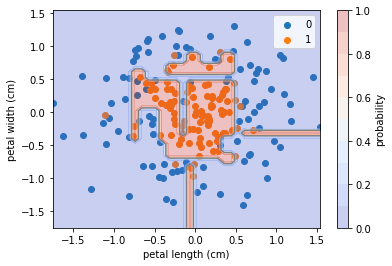

In [54]:
# fit
clf.fit(X, y)

# Get score, accuracy, 
print("dt acc:", clf.score(X, y))

# check most frequent baseline
print("baseline acc:", pd.value_counts(y, normalize=True)[0])

# plot decision surfaces
from src.utils.DataFrameExplorer_simple_plots import plot_decision_surface
plot_decision_surface(X, y, clf)

#### Visualize the tree with skleanr method

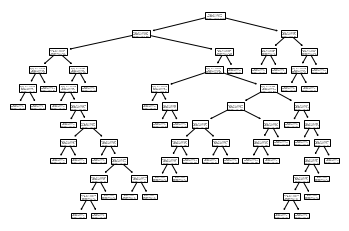

In [55]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

#### visualize the tree with graphiz
https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
* gives you more control over the objects
* use export_graphviz() &  graphviz.Source()
* feature names, 
    - provided as column names for array given to DecisionTreeClassifier you dont have to select them, the model, and export_graphviz funciotns will do that automatically,
* class names
    * for this moment, I think they are in the same order as int, 
    * ie. you give a folliwing list [class_1_name, class_2_name] for 0, and 1, respectively
* max depth
    * caution with that !
    * it is being set twice, 
        * once in DecisionTreeClassifier, and then again in export_graphviz
        * export_graphviz will always plot a max depth that requested, 
        * or max available levels
    * if you request lower depth to export_graphviz, while there is more levels available in a given model, they will be shown as __grey nodes__,
        * only one level more is shown in that way, even if 2 or more are available,
        
* potential issues
    * Try to reinstall graphviz   
    !conda remove graphviz   
    !conda install python-graphviz   
    !graphviz.Source(dot_graph).view()    
    
* MY experience
    * this plotting method return very nice fogures, but it often fail to plot the .dot objects in jupyter lab, 
    * in case of these problem, you woudl have to first convert your image into .png format, 
    * and next plot it with image() function



In [58]:
import graphviz # !pip install graphviz
from sklearn.tree import export_graphviz
from IPython.display import display # allows allows you to insert DOT text directly (without saving it to file first)

# Function, ....................................................
dot_data = export_graphviz(
    clf,                              # INPUT; decision tree obj, 
    out_file=None,                    # OUTPUT; if None, the obj, is returned 
                                      #         as GraphViz dot format (string)
    # feature, class names to display, 
    feature_names=['feature_0', 'feature_1'],   # name of the features in X
    class_names=['0', '1'],           # names of the features in Y
    max_depth=1,                      # optional, If None, the tree is fully generated.

    # starts displayed in each node,
    node_ids=False,                   # shows node ID number, 
    impurity=True,                    # True, is default, eg shows gini in each node,  
    proportion=True,                  # display proportion of each class, in each node
    precision=2,                      # number of digits displayed for each float,

    # tree orientation, 
    rotate=False,                     # True; top-down, False; right-left
     
    # node aestetics,
    filled=True,                      # add color, to nodes, 
    rounded=True,                     # round corners in node boxes, 
       
    # leave features,
    leaves_parallel=True              # display all leaves at the bottom
)
 
#graphviz.Source(dot_data) # plots the tree,
'''unfortunately it doent work'''
dot_data = export_graphviz(clf)    
gvz=graphviz.Source(dot_data)
#display(gvz)
#graphviz.Source(dot_data) # péots the tree, 
# print(gvz.source)

"""
    What I see on a graph;
    
    gini:      the impurity measure of that node,
    samples:   the % of samples in this node,
    values:    the probabilities of each class (done for each class separately)
    class:     name of the most frequent class
    
    CAUTION - this must be the last function in a cell !!!!


""";

## other materials

* examine dt model https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py 

* two class ada boost https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py